In [1]:
import seaborn as sns

df = sns.load_dataset("titanic")
print(f"{df.shape = }")
print(df.head().to_string())

df.shape = (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True


In [10]:
possible_values = list(set(df.select_dtypes(include=['object','int','bool','category']).columns) - set(['survived']))
possible_values

['embarked',
 'alive',
 'parch',
 'pclass',
 'deck',
 'who',
 'alone',
 'adult_male',
 'embark_town',
 'sex',
 'class',
 'sibsp']

In [11]:
var = 'who'

In [ ]:
pdf = df.groupby([var], dropna=False, observed=False).agg(
    **{
        "n": ("survived", "size"),
        "survived_rate": ("survived", "mean"),
    }
)
pdf

,n,survived_rate
who,,
child,83,0.590361
man,537,0.163873
woman,271,0.756458


<Axes: xlabel='who'>

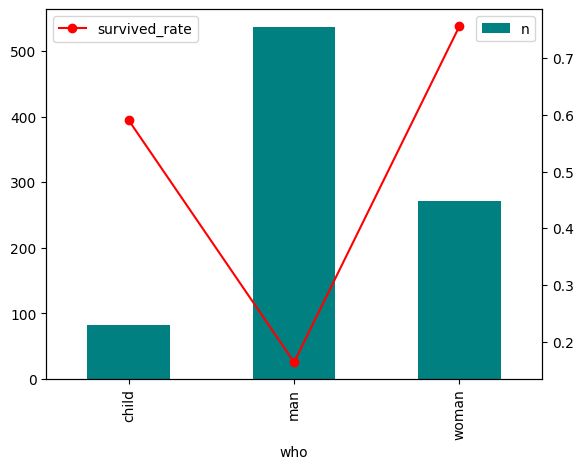

In [13]:
ax = pdf.plot(kind="bar", y="n", color = 'teal')
ax2 = ax.twinx()
pdf.plot(kind="line", y="survived_rate", ax=ax2, color="red", marker="o")